In [17]:
import torch
import torchvision
import torchvision.transforms as T

import sys
import os

vit_path = os.path.join(os.getcwd(), '../vit_pytorch')
if vit_path not in sys.path:
    sys.path.append(vit_path)
from vit_pytorch import ViT

In [18]:
transform = T.Compose([
    T.ToTensor(),
    T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 4

train_set = torchvision.datasets.CIFAR10(root='../data', train=True, download=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='../data', train=False, download=True, transform=transform)
testLoader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


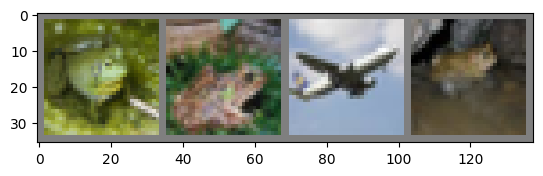

frog  frog  plane frog 


In [21]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 + 0.5
    nimg = img.numpy()
    plt.imshow(np.transpose(nimg, (1, 2, 0)))
    plt.show()

dataIter = iter(trainLoader)
images, labels = next(dataIter)
imshow(torchvision.utils.make_grid(images)) 
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [23]:
images.shape

torch.Size([4, 3, 32, 32])

In [24]:
model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=10,
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.1,
    emb_dropout = 0.1
)
print(model)

ViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=4, p2=4)
    (1): LayerNorm((48,), eps=1e-05, elementwise_affine=True)
    (2): Linear(in_features=48, out_features=1024, bias=True)
    (3): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer): Transformer(
    (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (layers): ModuleList(
      (0-5): 6 x ModuleList(
        (0): Attention(
          (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (attend): Softmax(dim=-1)
          (dropout): Dropout(p=0.1, inplace=False)
          (to_qkv): Linear(in_features=1024, out_features=3072, bias=False)
          (to_out): Sequential(
            (0): Linear(in_features=1024, out_features=1024, bias=True)
            (1): Dropout(p=0.1, inplace=False)
          )
        )
        (1): FeedForward(
          (net): Sequential(
           

In [27]:
import  torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

In [ ]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss/2000}')
            running_loss = 0.0

print('Finished Training')

In [ ]:
PATH = '../checkpoint/cifar_vit.pth'
torch.save(model.state_dict(), PATH)